In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
data = yf.download(tickers='TSLA',start='2003-08-01',end='2024-06-25')

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-17,177.919998,188.809998,177.000000,187.440002,187.440002,109786100
2024-06-18,186.559998,187.199997,182.369995,184.860001,184.860001,68982300
2024-06-20,184.679993,185.210007,179.660004,181.570007,181.570007,55893100
2024-06-21,182.300003,183.949997,180.690002,183.009995,183.009995,63029500
2024-06-24,184.970001,188.800003,182.550003,182.580002,182.580002,61204300


Text(0.5, 1.0, 'OverALL Tesla Close trade')

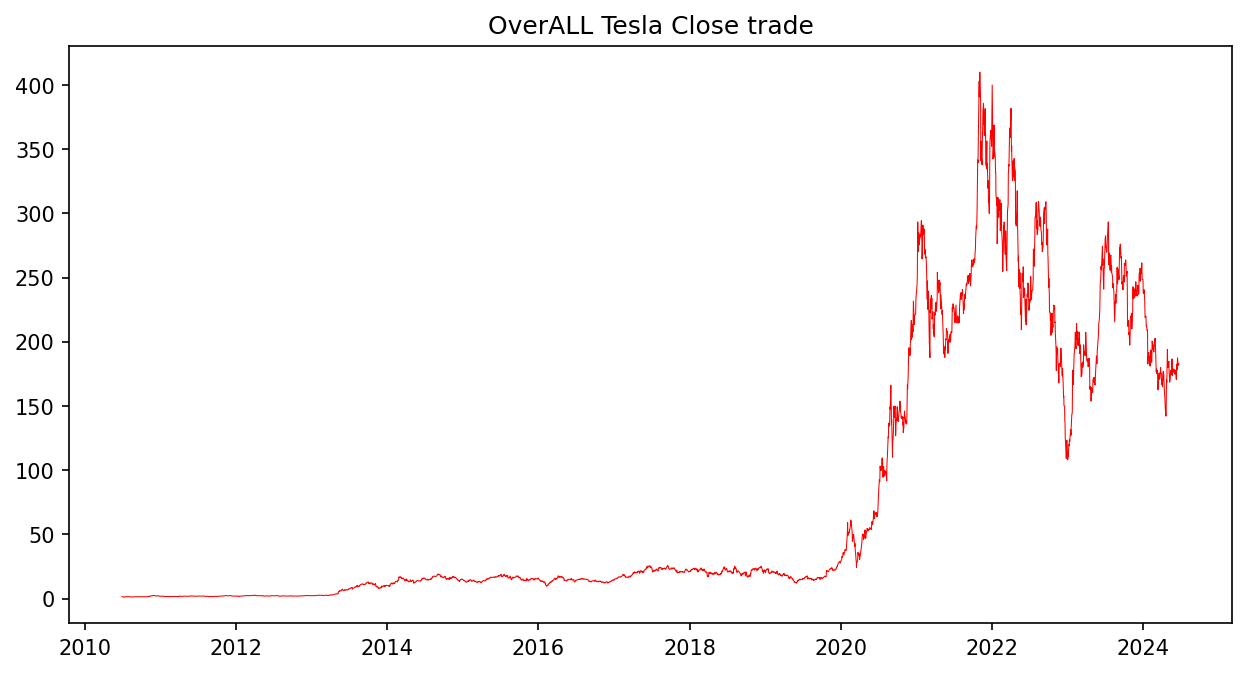

In [4]:
plt.figure(figsize=(10,5),dpi=150)
plt.plot(data['Close'],lw=0.5,color='r')
plt.title('OverALL Tesla Close trade')

In [5]:
len(data)

3520

In [6]:
short_window = 50

In [7]:
long_window = 200

In [8]:
data['Short MA'] = data['Close'].rolling(short_window,min_periods=1,center=False).mean()
data['Long MA'] = data['Close'].rolling(long_window,min_periods=1,center=False).mean()

In [9]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Short MA,Long MA
Date,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,1.592667,1.592667
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,1.590667,1.590667
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,1.548445,1.548445
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,1.481333,1.481333
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,1.399867,1.399867


In [10]:
data['Signal'] = 0.0

In [11]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Short MA,Long MA,Signal
Date,,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,1.592667,1.592667,0.0
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,1.590667,1.590667,0.0
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,1.548445,1.548445,0.0
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,1.481333,1.481333,0.0
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,1.399867,1.399867,0.0


In [12]:
data['Signal'][short_window:] = np.where( data['Short MA'][short_window:] > data['Long MA'][short_window:] , 1.0 ,0.0)

C:\Users\HP\AppData\Local\Temp\ipykernel_8220\4167768334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][short_window:] = np.where( data['Short MA'][short_window:] > data['Long MA'][short_window:] , 1.0 ,0.0)


In [13]:
data['Signal'].value_counts()

Signal
1.0    2197
0.0    1323
Name: count, dtype: int64

In [14]:
data['Position'] = data['Signal'].diff()

In [15]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Short MA,Long MA,Signal,Position
Date,,,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,1.592667,1.592667,0.0,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,1.590667,1.590667,0.0,0.0
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,1.548445,1.548445,0.0,0.0
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,1.481333,1.481333,0.0,0.0
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,1.399867,1.399867,0.0,0.0


In [16]:
data['Position'].value_counts()

Position
 0.0    3493
 1.0      13
-1.0      13
Name: count, dtype: int64

In [17]:
data['Position'].shift().value_counts()

Position
 0.0    3492
 1.0      13
-1.0      13
Name: count, dtype: int64

In [18]:
initial_captial = 10000.00
shares = 10
data['Portfolio Value'] = initial_captial + (data['Close'].diff() * data['Position'].shift() * shares).cumsum()

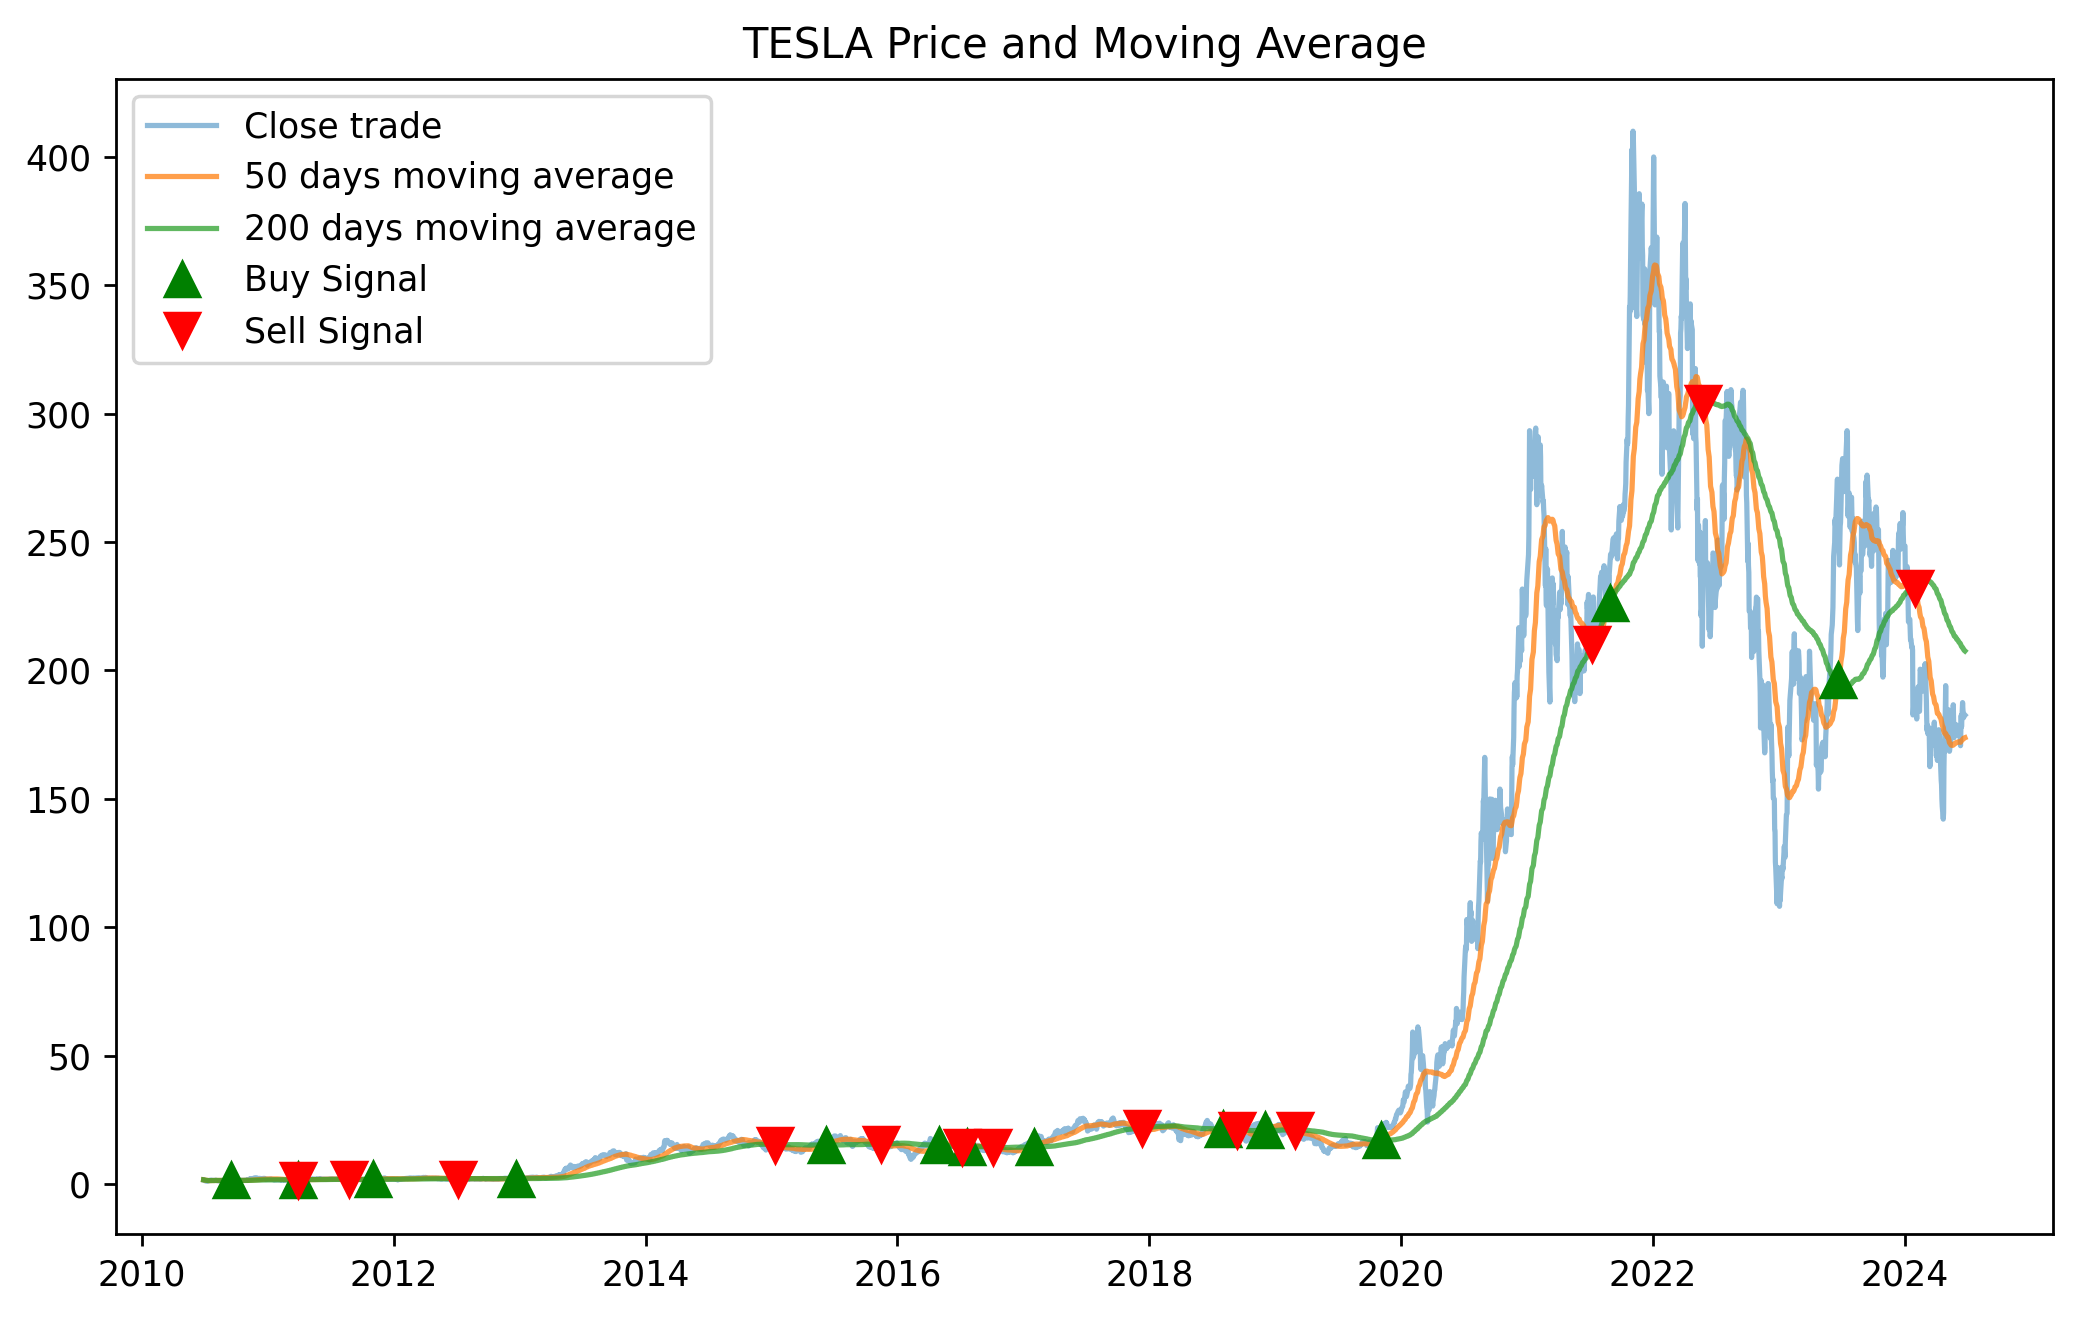

In [19]:
plt.figure(figsize=(10,6) ,dpi=250)
plt.plot(data['Close'],label = 'Close trade' ,alpha=0.5)
plt.plot(data['Short MA'],label = '50 days moving average',alpha=0.75)
plt.plot(data['Long MA'],label = '200 days moving average' , alpha=0.75)
plt.plot(data[data['Position']==1.0].index,data['Short MA'][data['Position']==1.0],'^',markersize=10,color='g',lw=0,label='Buy Signal')
plt.plot(data[data['Position']==-1.0].index,data['Long MA'][data['Position']==-1.0],'v',markersize=10,color='r',lw=0,label='Sell Signal')
plt.title('TESLA Price and Moving Average')
plt.legend()
plt.savefig('Tesla_price_and_moving_averages.png')